In [1]:
import yfinance as yf
import pandas as pd
import xlwings as xw
import numpy as np
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
from pandas_datareader import data 

import yfinance as yfin
import statistics
import seaborn as sns


In [8]:
assets = ['^MXX','WALMEX.MX','FEMSAUBD.MX','ALFAA.MX','CEMEXCPO.MX','BIMBOA.MX','GFNORTEO.MX','SORIANAB.MX','ALPEKA.MX','GCARSOA1.MX','LIVEPOL1.MX','ELEKTRA.MX','PE&OLES.MX','GFINBURO.MX','GRUMAB.MX','ICA.MX','CULTIBAB.MX','GNP.MX','FRAGUAB.MX','KIMBERA.MX','SIMECB.MX','ALSEA.MX','GPH1.MX','VITROA.MX','GENTERA.MX','HERDEZ.MX','VOLARA.MX','LABB.MX','MEGACPO.MX','BEVIDESA.MX','AXTELCPO.MX','GCC.MX','GISSAA.MX','CMOCTEZ.MX','BAFARB.MX','GPROFUT.MX','LAMOSA.MX','CABLECPO.MX','CERAMICB.MX','PINFRA.MX','AGUA.MX','CIEB.MX','ARA.MX','POCHTECB.MX','ASURB.MX','FINDEP.MX','POSADASA.MX','MINSAB.MX','GAPB.MX','INVEXA.MX','MONEXB.MX','COLLADO.MX','AUTLANB.MX','PASAB.MX']
yfin.pdr_override()

stocks = data.get_data_yahoo(assets, start='2019-01-14', end='2024-03-14')


[*********************100%%**********************]  54 of 54 completed


In [119]:
df2=pd.read_excel("SECTORES.xlsx") #leemos nuestra base de datos
df2['SCTR']=df2['SCTR'].astype(int)
s = df2.groupby(['SECTOR','SCTR']).count()
s

,,ACTIVO
SECTOR,SCTR,
CONSUMO,1,19
FINANZAS,4,7
INDUSTRIAL,2,10
MATERIALES,3,12
SALUD,5,3
TELECOMUNICACIONES,6,4


In [9]:
stocks.head(8)
stocks1=stocks['Adj Close']

In [10]:
stocks1.head
retornos = np.log(stocks1).diff()
retornos = retornos.dropna()
retornos
rendmx = ['^MXX']

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


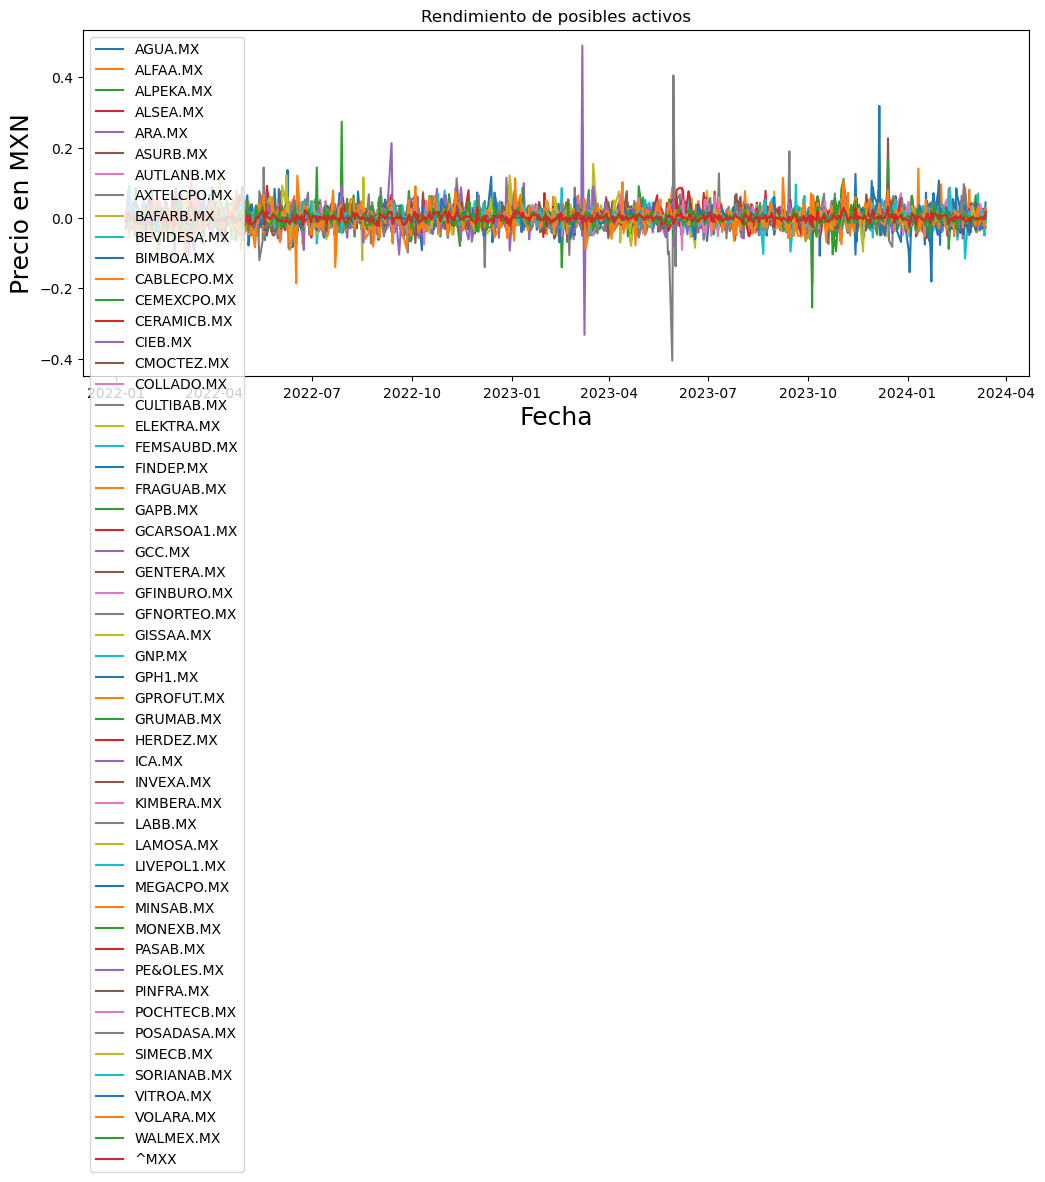

In [11]:
plt.figure(figsize=(12.2,4.5)) 
for i in retornos.columns.values:
    plt.plot( retornos[i],  label=i)
plt.title('Rendimiento de posibles activos')
plt.xlabel('Fecha',fontsize=18)
plt.ylabel('Precio en MXN',fontsize=18)
plt.legend(retornos.columns.values, loc='upper left')
plt.savefig('plotprecios.png', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
acumulado = (1+retornos).cumprod()
#acumulado.fillna(0, inplace = True)
acumulado

,AGUA.MX,ALFAA.MX,ALPEKA.MX,ALSEA.MX,ARA.MX,ASURB.MX,AUTLANB.MX,AXTELCPO.MX,BAFARB.MX,BEVIDESA.MX,...,PE&OLES.MX,PINFRA.MX,POCHTECB.MX,POSADASA.MX,SIMECB.MX,SORIANAB.MX,VITROA.MX,VOLARA.MX,WALMEX.MX,^MXX
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-10,1.015089,0.981269,0.992121,1.008064,0.997677,1.007692,1.000000,0.967997,1.000000,1.0,...,0.993483,0.992704,1.0000,1.000000,0.994444,1.000000,0.993168,1.005805,0.986507,0.993090
2022-01-11,1.014709,1.009714,0.991197,1.007370,1.006915,0.986658,0.992337,0.988759,1.000000,1.0,...,1.006605,0.992831,1.0000,1.014938,0.980497,0.992903,0.985050,1.029084,0.988419,0.997332
2022-01-12,1.031294,1.030785,1.003584,0.995503,1.011544,0.991876,0.992337,1.066893,1.000000,1.0,...,1.049277,1.015885,1.0000,1.014938,0.986021,0.975277,0.985050,1.036990,0.994554,1.013907
2022-01-13,1.012505,1.018349,1.007270,0.995734,1.027656,0.997950,1.021669,1.105413,1.000000,1.0,...,1.051017,0.999385,1.0000,1.009909,1.018763,0.998700,0.978647,1.048826,0.982447,1.013518
2022-01-14,1.021959,1.016287,1.010956,0.988538,1.020673,1.017749,1.022432,1.076287,1.000000,1.0,...,1.011660,0.989160,1.0000,1.013248,0.996317,0.997035,0.974383,1.050412,0.977100,1.010025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-07,1.011500,0.829214,0.493646,1.437188,0.764809,1.106500,0.756510,0.134443,1.613503,1.0,...,0.733184,1.186051,0.9895,0.905103,0.933474,1.295578,0.398773,0.243279,0.891773,1.008420
2024-03-08,0.986893,0.840879,0.512991,1.421824,0.771858,1.120384,0.740327,0.134114,1.613503,1.0,...,0.733356,1.185330,1.0272,0.905103,0.933474,1.317126,0.385380,0.242496,0.895367,1.006338
2024-03-11,0.981294,0.834637,0.495869,1.436394,0.755155,1.117830,0.737119,0.135420,1.613503,1.0,...,0.742217,1.170820,1.0272,0.905103,0.933474,1.345527,0.376503,0.240534,0.890015,1.008902


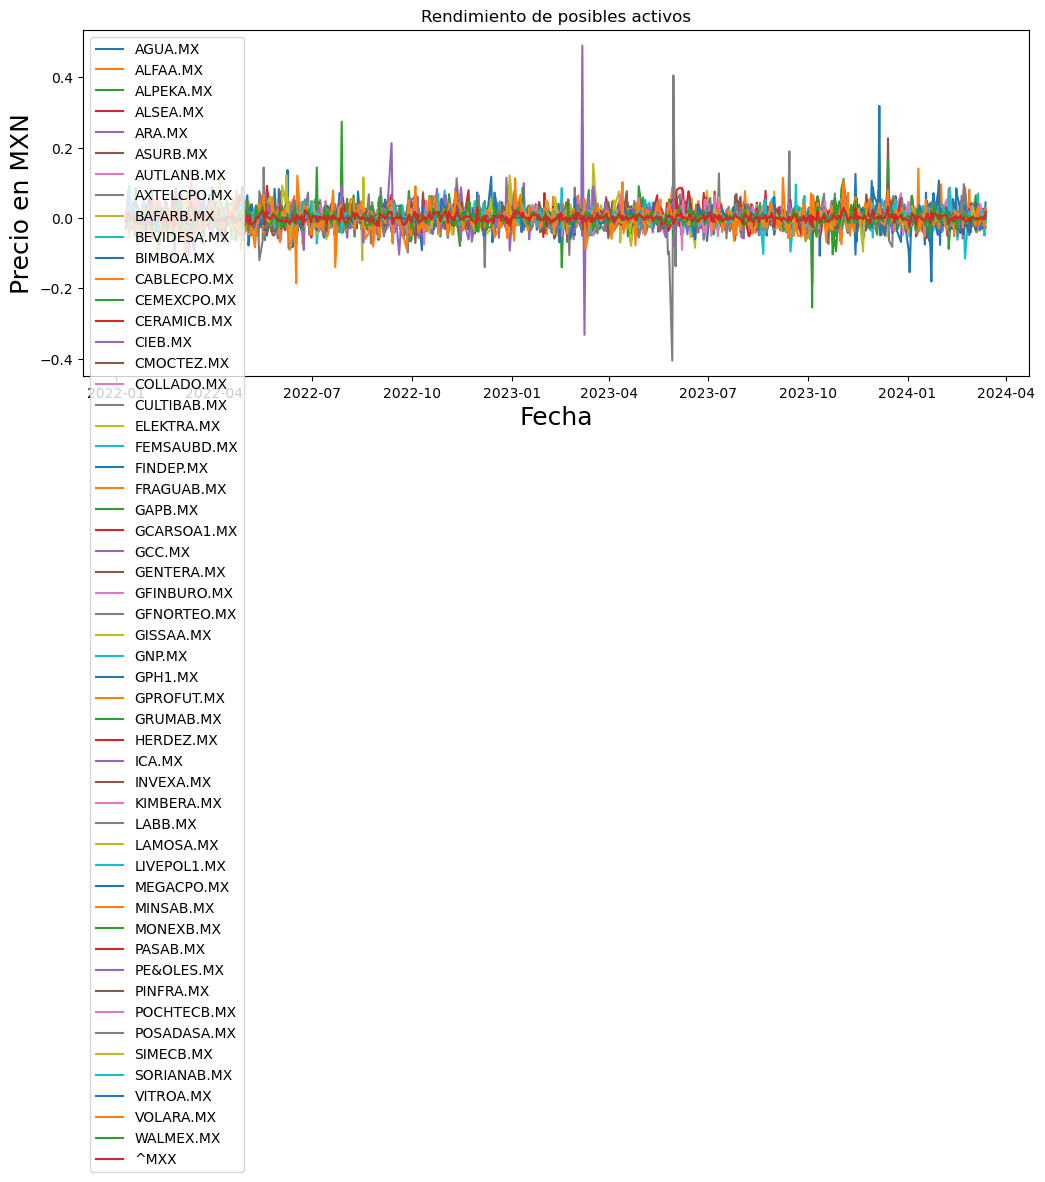

In [13]:
plt.figure(figsize=(12.2,4.5)) 
for i in retornos.columns.values:
    plt.plot( retornos[i],  label=i)
plt.title('Rendimiento de posibles activos')
plt.xlabel('Fecha',fontsize=18)
plt.ylabel('Precio en MXN',fontsize=18)
plt.legend(retornos.columns.values, loc='upper left')
plt.savefig('plotprecios.png', dpi=300, bbox_inches='tight')
plt.show()

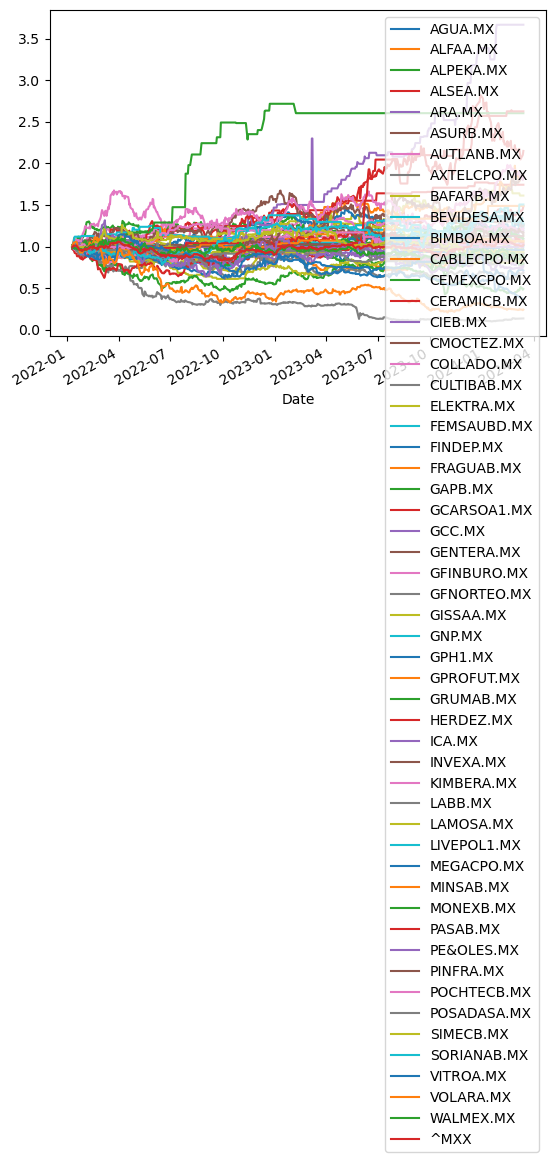

In [14]:
acumulado.plot()
plt.show()

In [15]:
Anualizado = acumulado[1:]**(252/len(acumulado))-1

In [16]:
REND=Anualizado.mean()


In [17]:
VOL=Anualizado.std()


In [18]:
REND_VOL=REND/VOL
REND_VOL

AGUA.MX       -0.606373
ALFAA.MX      -1.318199
ALPEKA.MX     -0.205851
ALSEA.MX       0.328145
ARA.MX        -1.858097
ASURB.MX       0.606206
AUTLANB.MX     0.465497
AXTELCPO.MX   -2.479870
BAFARB.MX      0.311754
BEVIDESA.MX         NaN
BIMBOA.MX      0.999888
CABLECPO.MX         NaN
CEMEXCPO.MX   -1.993027
CERAMICB.MX    1.634774
CIEB.MX        0.960860
CMOCTEZ.MX     0.473558
COLLADO.MX     3.426090
CULTIBAB.MX   -1.714602
ELEKTRA.MX    -2.555568
FEMSAUBD.MX    0.164252
FINDEP.MX      0.256295
FRAGUAB.MX     0.903243
GAPB.MX        0.021075
GCARSOA1.MX    1.336139
GCC.MX        -0.292053
GENTERA.MX     1.994576
GFINBURO.MX    2.842800
GFNORTEO.MX    0.046134
GISSAA.MX      0.882699
GNP.MX         0.876544
GPH1.MX        0.571956
GPROFUT.MX     1.189165
GRUMAB.MX      0.200613
HERDEZ.MX     -0.386076
ICA.MX        -1.262633
INVEXA.MX      0.848147
KIMBERA.MX     0.440117
LABB.MX       -1.639320
LAMOSA.MX     -0.452746
LIVEPOL1.MX    2.291708
MEGACPO.MX    -2.205281
MINSAB.MX      0

In [27]:
cov = retornos.cov()*252
cov_with_market = cov.iloc[0,1]
market_var = retornos.var()*252
stock_beta = cov_with_market / market_var

In [28]:
tasalibredriesgo = 0.0095
riskpremium = (retornos['^MXX'].mean()*252) - tasalibredriesgo

In [29]:
stock_capm_return = tasalibredriesgo + stock_beta * riskpremium


In [30]:
sharpe_stock = (stock_capm_return - tasalibredriesgo) /(Anualizado.std()*252**0.5)

In [31]:
BETAS=(round(stock_beta,3))


In [35]:
CAPM=REND-stock_capm_return
CAPM

AGUA.MX       -3.385313e-02
ALFAA.MX      -7.554886e-02
ALPEKA.MX     -4.255515e-02
ALSEA.MX       1.636516e-02
ARA.MX        -7.764670e-02
ASURB.MX       1.683114e-02
AUTLANB.MX     1.855915e-02
AXTELCPO.MX   -4.445646e-01
BAFARB.MX      3.448294e-02
BEVIDESA.MX            -inf
BIMBOA.MX      5.545567e-02
CABLECPO.MX            -inf
CEMEXCPO.MX   -1.572614e-01
CERAMICB.MX    1.346835e-01
CIEB.MX        2.475607e-01
CMOCTEZ.MX    -4.113410e-03
COLLADO.MX     8.119764e-03
CULTIBAB.MX   -6.952373e-02
ELEKTRA.MX    -1.138014e-01
FEMSAUBD.MX   -9.815372e-04
FINDEP.MX     -1.614341e-02
FRAGUAB.MX     8.241532e-02
GAPB.MX       -1.024152e-02
GCARSOA1.MX    2.048341e-01
GCC.MX        -2.993171e-02
GENTERA.MX     1.390927e-01
GFINBURO.MX    1.694013e-01
GFNORTEO.MX   -9.322287e-03
GISSAA.MX      3.182930e-02
GNP.MX         2.826979e-03
GPH1.MX       -6.462661e-02
GPROFUT.MX     5.376410e-02
GRUMAB.MX     -2.865434e-03
HERDEZ.MX     -3.937329e-02
ICA.MX        -1.112738e+09
INVEXA.MX     -2.306

In [36]:
SHARP=round(sharpe_stock,3)
SHARP

AGUA.MX        2.000000e-03
ALFAA.MX       4.000000e-03
ALPEKA.MX      1.000000e-03
ALSEA.MX       2.000000e-03
ARA.MX         6.000000e-03
ASURB.MX       3.000000e-03
AUTLANB.MX     5.000000e-03
AXTELCPO.MX    0.000000e+00
BAFARB.MX      1.000000e-03
BEVIDESA.MX             inf
BIMBOA.MX      3.000000e-03
CABLECPO.MX             inf
CEMEXCPO.MX    2.000000e-03
CERAMICB.MX    1.100000e-02
CIEB.MX        0.000000e+00
CMOCTEZ.MX     2.300000e-02
COLLADO.MX     1.350000e-01
CULTIBAB.MX    6.000000e-03
ELEKTRA.MX     1.100000e-02
FEMSAUBD.MX    4.000000e-03
FINDEP.MX      2.700000e-02
FRAGUAB.MX     2.000000e-03
GAPB.MX        2.000000e-03
GCARSOA1.MX    1.000000e-03
GCC.MX         4.000000e-03
GENTERA.MX     2.000000e-03
GFINBURO.MX    2.000000e-03
GFNORTEO.MX    3.000000e-03
GISSAA.MX      4.000000e-03
GNP.MX         3.700000e-02
GPH1.MX        2.820000e-01
GPROFUT.MX     9.000000e-03
GRUMAB.MX      5.000000e-03
HERDEZ.MX      2.000000e-03
ICA.MX         4.280149e+14
INVEXA.MX      9.800

In [37]:
datos=[REND,VOL,REND_VOL,BETAS,CAPM,SHARP]
col=['REND','VOL','REND_VOL','BETAS','CAPM','SHARP']

In [38]:
DF = pd.DataFrame(datos,index=col)
DF

,AGUA.MX,ALFAA.MX,ALPEKA.MX,ALSEA.MX,ARA.MX,ASURB.MX,AUTLANB.MX,AXTELCPO.MX,BAFARB.MX,BEVIDESA.MX,...,PE&OLES.MX,PINFRA.MX,POCHTECB.MX,POSADASA.MX,SIMECB.MX,SORIANAB.MX,VITROA.MX,VOLARA.MX,WALMEX.MX,^MXX
REND,-0.022981,-0.062720,-0.030696,0.029321,-0.064881,0.028795,0.033575,-0.434407,0.047602,0.0,...,-0.056510,0.024398,0.049197,-0.047817,0.029609,0.047160,-0.089750,-0.297284,-0.023913,-0.016421
VOL,0.037898,0.047580,0.149118,0.089355,0.034918,0.047500,0.072128,0.175173,0.152690,0.0,...,0.060812,0.053659,0.037882,0.026073,0.033437,0.066771,0.075321,0.137491,0.024185,0.025685
REND_VOL,-0.606373,-1.318199,-0.205851,0.328145,-1.858097,0.606206,0.465497,-2.479870,0.311754,NaN,...,-0.929257,0.454680,1.298679,-1.833974,0.885529,0.706304,-1.191572,-2.162209,-0.988750,-0.639341
BETAS,0.107000,0.260000,0.185000,0.270000,0.255000,0.193000,0.431000,0.051000,0.283000,inf,...,0.098000,0.315000,0.575000,0.680000,0.351000,0.264000,0.148000,0.078000,0.350000,0.899000
CAPM,-0.033853,-0.075549,-0.042555,0.016365,-0.077647,0.016831,0.018559,-0.444565,0.034483,-inf,...,-0.067257,0.010870,0.032342,-0.066006,0.015628,0.034288,-0.101143,-0.307781,-0.037884,-0.037417
SHARP,0.002000,0.004000,0.001000,0.002000,0.006000,0.003000,0.005000,0.000000,0.001000,inf,...,0.001000,0.005000,0.012000,0.021000,0.008000,0.003000,0.002000,0.000000,0.012000,0.028000


In [39]:
DF1 = DF.T
DF1
DF1.index.name = 'ACTIVOS'
DF1

DF1=DF1.merge(df2, left_on=['ACTIVOS'], right_on=['ACTIVO'])
DF1=DF1.drop(columns=['SECTOR'])
DF1 = DF1.set_index('ACTIVO')
Filt=(DF1['REND']>0)
DF1=DF1.loc[Filt,['REND','VOL','REND_VOL','BETAS','CAPM','SHARP','SCTR']]
DF1

,REND,VOL,REND_VOL,BETAS,CAPM,SHARP,SCTR
ACTIVO,,,,,,,
ALSEA.MX,0.029321,0.089355,0.328145,0.270,0.016365,0.002,1
ASURB.MX,0.028795,0.047500,0.606206,0.193,0.016831,0.003,2
AUTLANB.MX,0.033575,0.072128,0.465497,0.431,0.018559,0.005,3
BAFARB.MX,0.047602,0.152690,0.311754,0.283,0.034483,0.001,1
BIMBOA.MX,0.067734,0.067742,0.999888,0.217,0.055456,0.003,1
CERAMICB.MX,0.162198,0.099218,1.634774,1.409,0.134683,0.011,3
CIEB.MX,0.258373,0.268898,0.960860,0.103,0.247561,0.000,1
CMOCTEZ.MX,0.022580,0.047682,0.473558,1.345,-0.004113,0.023,3
COLLADO.MX,0.046915,0.013694,3.426090,2.291,0.008120,0.135,3


In [40]:
DF1.dtypes

REND        float64
VOL         float64
REND_VOL    float64
BETAS       float64
CAPM        float64
SHARP       float64
SCTR          int32
dtype: object

In [41]:
newdf2=pd.get_dummies(data=DF1, drop_first=True)
newdf2

,REND,VOL,REND_VOL,BETAS,CAPM,SHARP,SCTR
ACTIVO,,,,,,,
ALSEA.MX,0.029321,0.089355,0.328145,0.270,0.016365,0.002,1
ASURB.MX,0.028795,0.047500,0.606206,0.193,0.016831,0.003,2
AUTLANB.MX,0.033575,0.072128,0.465497,0.431,0.018559,0.005,3
BAFARB.MX,0.047602,0.152690,0.311754,0.283,0.034483,0.001,1
BIMBOA.MX,0.067734,0.067742,0.999888,0.217,0.055456,0.003,1
CERAMICB.MX,0.162198,0.099218,1.634774,1.409,0.134683,0.011,3
CIEB.MX,0.258373,0.268898,0.960860,0.103,0.247561,0.000,1
CMOCTEZ.MX,0.022580,0.047682,0.473558,1.345,-0.004113,0.023,3
COLLADO.MX,0.046915,0.013694,3.426090,2.291,0.008120,0.135,3


In [42]:
newdf3 = newdf2.drop(columns=['VOL','REND_VOL','CAPM','SHARP'])

In [44]:
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ------------------------------------------------------------------------------
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets
# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

In [120]:
explicativas=DF1[['VOL','CAPM','SCTR','BETAS','SHARP']]

Objetivo=DF1[['REND']]
Objetivo

,REND
ACTIVO,
ALSEA.MX,0.029321
ASURB.MX,0.028795
AUTLANB.MX,0.033575
BAFARB.MX,0.047602
BIMBOA.MX,0.067734
CERAMICB.MX,0.162198
CIEB.MX,0.258373
CMOCTEZ.MX,0.022580
COLLADO.MX,0.046915


In [121]:
#División de los datos en train y test
# ------------------------------------------------------------------------------

X = explicativas
y = Objetivo
regressor = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
regressor.fit(X,y)




DecisionTreeRegressor(random_state=0)

In [122]:
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 28)


In [123]:
# Initializing the Decision Tree Regression model
model = DecisionTreeRegressor(random_state = 0)

# Fitting the Decision Tree Regression model to the data
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [125]:
# Predicting the target values of the test set
y_pred = model.predict(x_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)
RMSE: 133.351


RMSE:  0.02


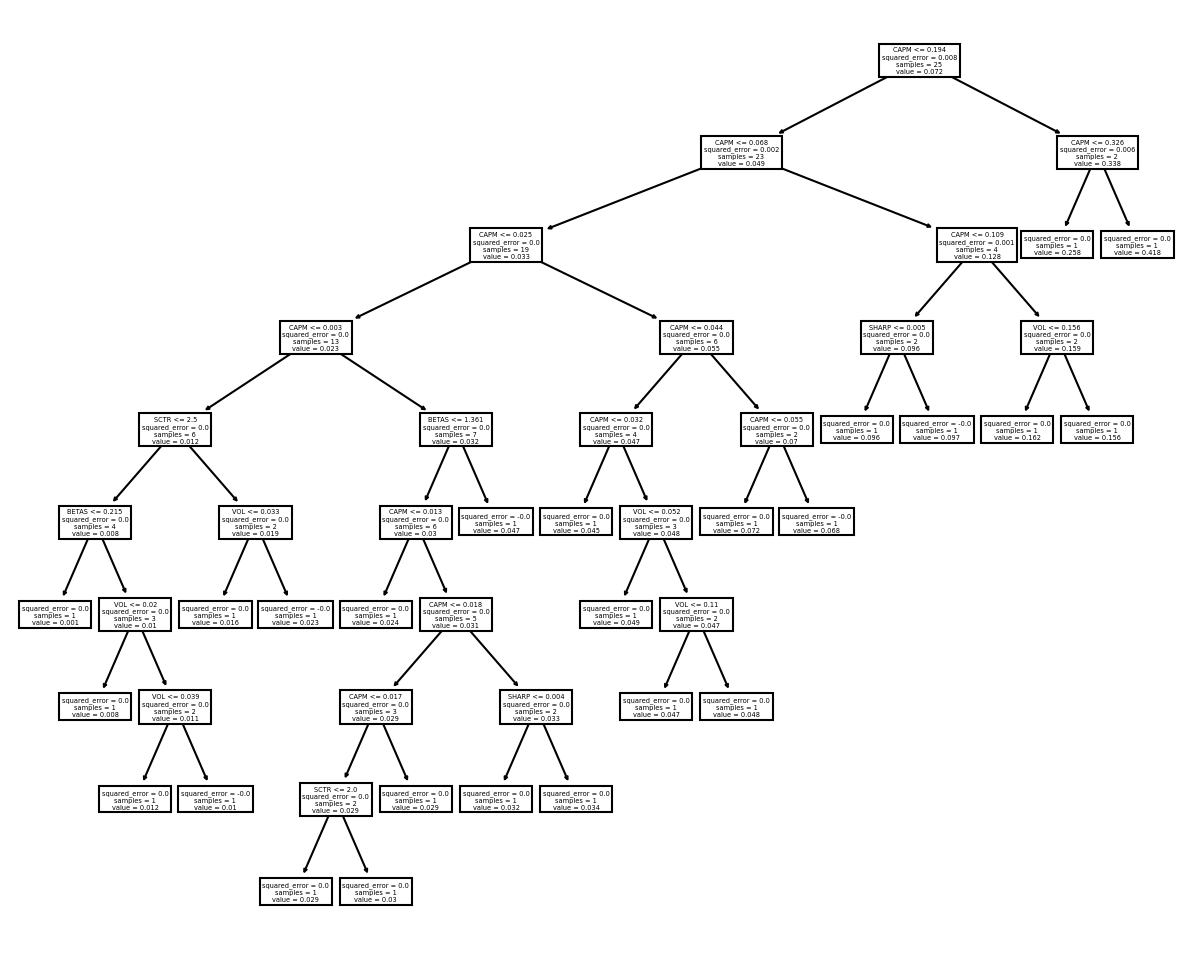

In [126]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model, feature_names=X.columns);

In [51]:
export_graphviz(model, out_file ='tree_structure.dot', 
               feature_names =['VOL','CAPM','SCTR'])

Profundidad del árbol: 9
Número de nodos terminales: 25


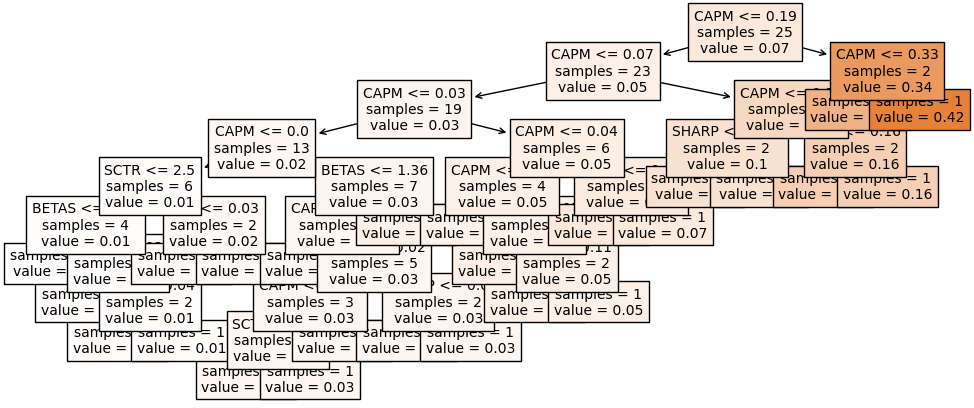

In [127]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {model.get_depth()}")
print(f"Número de nodos terminales: {model.get_n_leaves()}")

plot = plot_tree(
            decision_tree = model,
            feature_names=explicativas.columns if hasattr(explicativas, "columns") else None,
            class_names=['VOL','CAPM','SCTR'],
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )
plt.show()

In [128]:
texto_model = export_text(
                    decision_tree = model,
                    feature_names = list(explicativas.columns)
               )
print(texto_model)

|--- CAPM <= 0.19
|   |--- CAPM <= 0.07
|   |   |--- CAPM <= 0.03
|   |   |   |--- CAPM <= 0.00
|   |   |   |   |--- SCTR <= 2.50
|   |   |   |   |   |--- BETAS <= 0.21
|   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |--- BETAS >  0.21
|   |   |   |   |   |   |--- VOL <= 0.02
|   |   |   |   |   |   |   |--- value: [0.01]
|   |   |   |   |   |   |--- VOL >  0.02
|   |   |   |   |   |   |   |--- VOL <= 0.04
|   |   |   |   |   |   |   |   |--- value: [0.01]
|   |   |   |   |   |   |   |--- VOL >  0.04
|   |   |   |   |   |   |   |   |--- value: [0.01]
|   |   |   |   |--- SCTR >  2.50
|   |   |   |   |   |--- VOL <= 0.03
|   |   |   |   |   |   |--- value: [0.02]
|   |   |   |   |   |--- VOL >  0.03
|   |   |   |   |   |   |--- value: [0.02]
|   |   |   |--- CAPM >  0.00
|   |   |   |   |--- BETAS <= 1.36
|   |   |   |   |   |--- CAPM <= 0.01
|   |   |   |   |   |   |--- value: [0.02]
|   |   |   |   |   |--- CAPM >  0.01
|   |   |   |   |   |   |--- CAPM <= 0.02
|   |   

In [129]:
importancia_predictores = pd.DataFrame(
                            {'predictor': explicativas.columns,
                             'importancia': model.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)


Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
1,CAPM,0.997361
3,BETAS,0.001522
2,SCTR,0.000867
0,VOL,0.000243
4,SHARP,0.000007


In [130]:
Filt=(DF1['CAPM']<=10.04)&(DF1['VOL']<=.084)&(DF1['SCTR']<=9)&(DF1['REND']>=0.05)  #Aplicamos un filtro a la base para descubirir la relacion de personas con diabetes y anemia
DF1.loc[Filt]

,REND,VOL,REND_VOL,BETAS,CAPM,SHARP,SCTR
ACTIVO,,,,,,,
BIMBOA.MX,0.067734,0.067742,0.999888,0.217,0.055456,0.003,1
GENTERA.MX,0.150711,0.075560,1.994576,0.166,0.139093,0.002,4
GFINBURO.MX,0.181418,0.063817,2.842800,0.197,0.169401,0.002,4
GPROFUT.MX,0.072389,0.060873,1.189165,0.714,0.053764,0.009,1
LIVEPOL1.MX,0.096847,0.042260,2.291708,0.483,0.081174,0.009,1


In [78]:
df_activos=retornos[['BIMBOA.MX','GENTERA.MX','GFINBURO.MX','GPROFUT.MX','AUTLANB.MX','GISSAA.MX','LIVEPOL1.MX']]
df_activos
df_benchmark1 =  retornos[['^MXX']]

In [79]:
def pesosPortafolio(dataframe):
    array = []
    for i in dataframe.columns:
        array.append(1/len(dataframe.columns))
    arrayFinal = np.array(array)
    return arrayFinal
pesos = pesosPortafolio(df_activos)
pesos

array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.14285714])

In [80]:

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [81]:
retornos1 = expected_returns.capm_return(df_activos, market_prices = df_benchmark1, returns_data= True, risk_free_rate=0.08, frequency=252)
retornos1

BIMBOA.MX      0.018045
GENTERA.MX     0.024156
GFINBURO.MX   -0.005858
GPROFUT.MX     0.074265
AUTLANB.MX     0.068472
GISSAA.MX      0.087716
LIVEPOL1.MX    0.073841
Name: mkt, dtype: float64

In [82]:
VOL= np.sqrt(252)*retornos1.std()
VOL

0.5693294270860895

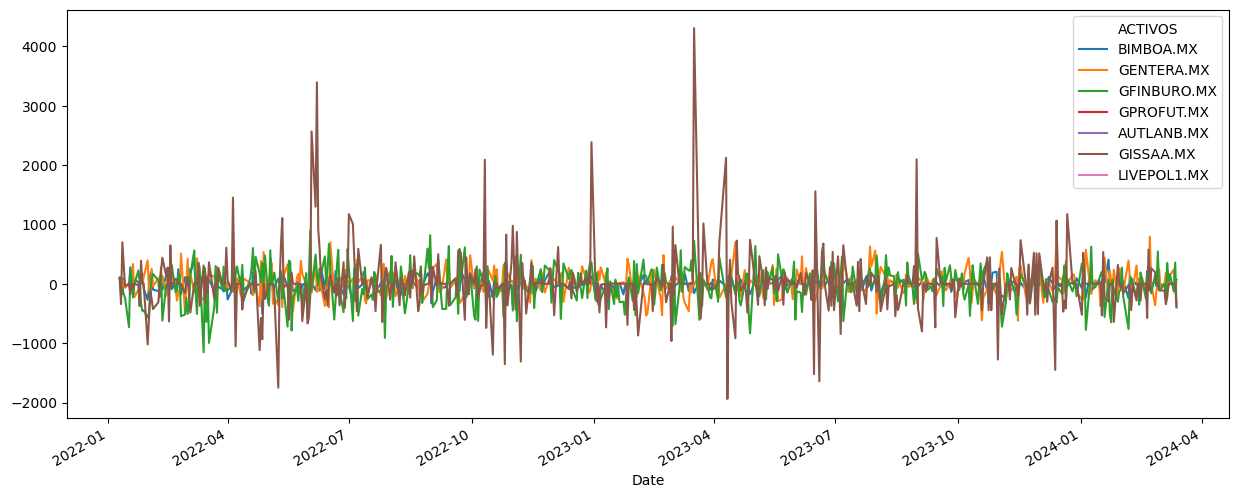

In [83]:
(df_activos / df_activos.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

In [84]:
df_benchmark1 =  retornos[['^MXX']]
df_benchmark1.head(10)

ACTIVOS,^MXX
Date,
2022-01-10,-0.006910
2022-01-11,0.004271
2022-01-12,0.016619
2022-01-13,-0.000384
2022-01-14,-0.003446
2022-01-17,0.004240
2022-01-18,-0.013825
2022-01-19,-0.007712
2022-01-20,-0.005979


In [71]:
RTT = df_benchmark1.mean() * 250
RTT


ACTIVOS
^MXX    0.022108
dtype: float64

In [85]:
def pesosPortafolio(dataframe):
    array = []
    for i in dataframe.columns:
        array.append(1/len(dataframe.columns))
    arrayFinal = np.array(array)
    return arrayFinal
pesos = pesosPortafolio(df_activos)
pesos

array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.14285714])

In [86]:
df_cov = df_activos.cov()*252
df_cov

ACTIVOS,BIMBOA.MX,GENTERA.MX,GFINBURO.MX,GPROFUT.MX,AUTLANB.MX,GISSAA.MX,LIVEPOL1.MX
ACTIVOS,,,,,,,
BIMBOA.MX,0.098637,0.016129,0.031208,-0.003041,0.002353,-0.000480,-0.002877
GENTERA.MX,0.016129,0.129391,0.023379,0.002300,0.001605,0.000215,0.003433
GFINBURO.MX,0.031208,0.023379,0.108917,0.002921,0.011871,-0.003149,0.001651
GPROFUT.MX,-0.003041,0.002300,0.002921,0.030039,0.000127,-0.001756,-0.001540
AUTLANB.MX,0.002353,0.001605,0.011871,0.000127,0.049688,0.002291,0.001006
GISSAA.MX,-0.000480,0.000215,-0.003149,-0.001756,0.002291,0.081459,-0.002775
LIVEPOL1.MX,-0.002877,0.003433,0.001651,-0.001540,0.001006,-0.002775,0.044399


In [87]:
#Varianza del Portafolio
varianza_portafolio = pesos.T @ df_cov @pesos
"La varianza del portafolio es:" + " " + str(round(varianza_portafolio*100,1))+"%"



'La varianza del portafolio es: 1.5%'

In [88]:
volatilidad_portafolio = np.sqrt(varianza_portafolio)
"La volatilidad del portafolio es:" + " " + str(round(volatilidad_portafolio*100,1))+"%"


'La volatilidad del portafolio es: 12.1%'

In [89]:
retorno_portafolio = np.sum(pesos*retornos1)
'El retorno anual del portafolio es:' + ' ' + str(round(retorno_portafolio*100,3)) + '%'



'El retorno anual del portafolio es: 4.866%'

In [108]:
ef = EfficientFrontier(retornos1, df_cov, weight_bounds=(-1,1))
weights = ef.min_volatility() 
cleaned_weights1 = ef.clean_weights() 
print(cleaned_weights1) 
ef.portfolio_performance(verbose=True)

OrderedDict([('BIMBOA.MX', 0.093), ('GENTERA.MX', 0.04155), ('GFINBURO.MX', 0.0227), ('GPROFUT.MX', 0.32933), ('AUTLANB.MX', 0.16336), ('GISSAA.MX', 0.12476), ('LIVEPOL1.MX', 0.2253)])
Expected annual return: 6.6%
Annual volatility: 9.6%
Sharpe Ratio: 0.48


(0.06577237490018627, 0.09605529393430243, 0.4765211059735296)

In [107]:
ef = EfficientFrontier(retornos1, df_cov,weight_bounds=(0,1))
weights = ef.max_sharpe() 
cleaned_weights2 = ef.clean_weights() 
print(cleaned_weights2) 
ef.portfolio_performance(verbose=True)

OrderedDict([('BIMBOA.MX', 0.01196), ('GENTERA.MX', 0.0), ('GFINBURO.MX', 0.0), ('GPROFUT.MX', 0.37808), ('AUTLANB.MX', 0.17639), ('GISSAA.MX', 0.17503), ('LIVEPOL1.MX', 0.25855)])
Expected annual return: 7.5%
Annual volatility: 10.4%
Sharpe Ratio: 0.53


(0.07481582154075739, 0.10366102508231445, 0.5287987601630372)

In [92]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df_activos)
pesos = cleaned_weights1 
da = DiscreteAllocation(pesos, latest_prices, total_portfolio_value=10000)
allocation, leftover = da.lp_portfolio()
print("Cantidad de acciones a comprar:", allocation)
print("Dinero sobrante: ${:.2f}".format(leftover))

Cantidad de acciones a comprar: {'GENTERA.MX': 538722, 'GFINBURO.MX': 339531, 'GPROFUT.MX': 537058, 'LIVEPOL1.MX': 537058}
Dinero sobrante: $579.91


In [93]:
df_activos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 549 entries, 2022-01-10 to 2024-03-13
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BIMBOA.MX    549 non-null    float64
 1   GENTERA.MX   549 non-null    float64
 2   GFINBURO.MX  549 non-null    float64
 3   GPROFUT.MX   549 non-null    float64
 4   AUTLANB.MX   549 non-null    float64
 5   GISSAA.MX    549 non-null    float64
 6   LIVEPOL1.MX  549 non-null    float64
dtypes: float64(7)
memory usage: 34.3 KB


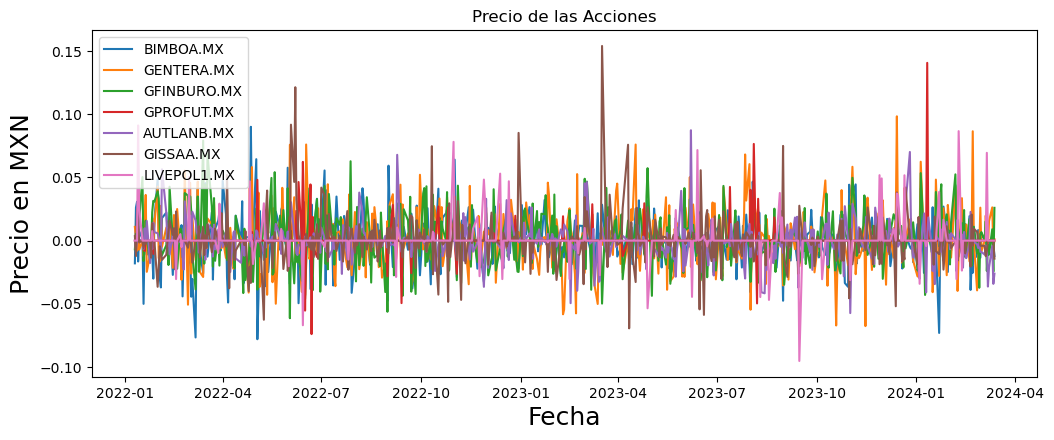

In [131]:
plt.figure(figsize=(12.2,4.5)) 
for i in df_activos.columns.values:
    plt.plot( df_activos[i],  label=i)
plt.title('Precio de las Acciones')
plt.xlabel('Fecha',fontsize=18)
plt.ylabel('Precio en MXN',fontsize=18)
plt.legend(df_activos.columns.values, loc='upper left')
plt.savefig('plotprecios.png', dpi=300, bbox_inches='tight')
plt.show()

In [95]:
df = np.log(df_activos).diff()
df = df_activos.dropna()
df

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


ACTIVOS,BIMBOA.MX,GENTERA.MX,GFINBURO.MX,GPROFUT.MX,AUTLANB.MX,GISSAA.MX,LIVEPOL1.MX
Date,,,,,,,
2022-01-10,-0.017996,0.010890,-0.006884,0.0,0.000000,0.003579,0.000000
2022-01-11,0.026182,0.002164,0.005268,0.0,-0.007663,-0.012222,0.000000
2022-01-12,0.030748,-0.007957,0.004839,0.0,0.000000,0.025001,0.000000
2022-01-13,-0.016544,0.006515,0.011995,0.0,0.029559,0.011922,0.091216
2022-01-14,0.007403,-0.007241,0.016164,0.0,0.000746,-0.001395,0.025318
...,...,...,...,...,...,...,...
2024-03-07,0.001390,-0.005401,-0.003293,0.0,-0.036368,0.000000,0.000000
2024-03-08,-0.004315,0.015355,-0.011121,0.0,-0.021391,0.000000,0.000000
2024-03-11,0.004037,0.026317,0.008984,0.0,-0.004334,0.000000,0.000000


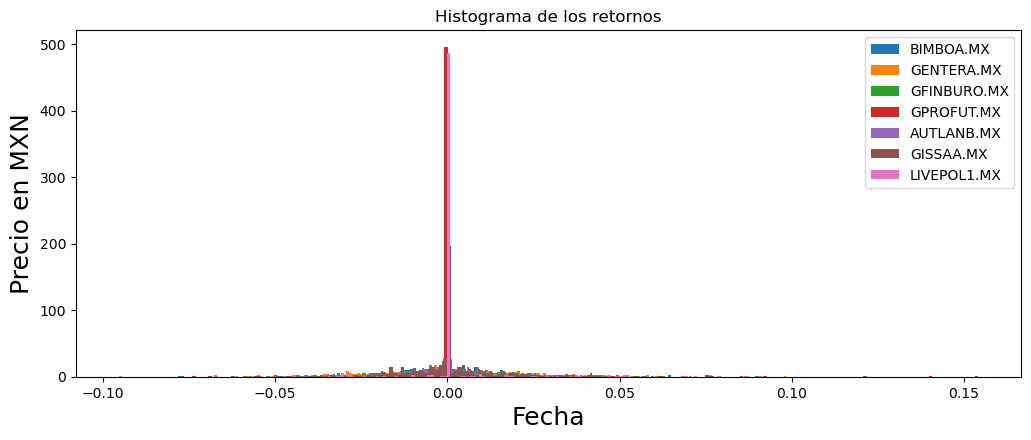

In [96]:
plt.figure(figsize=(12.2,4.5)) 
for i in df_activos.columns.values:
    plt.hist( df[i],  label=i, bins = 200)
plt.title('Histograma de los retornos')
plt.xlabel('Fecha',fontsize=18)
plt.ylabel('Precio en MXN',fontsize=18)
plt.legend(df.columns.values)
plt.savefig('plotretornosnormales.png', dpi=300, bbox_inches='tight')
plt.show()


La pérdida máxima de tu cartera inicial de 100000 usd con un nivel de confianza del 95.0% y para los siguientes 252 días es de:

A 1 días, VaR(95.0%) = 948.27   Portfolio : 100047.02
A 2 días, VaR(95.0%) = 1341.05   Portfolio : 100094.06
A 3 días, VaR(95.0%) = 1642.44   Portfolio : 100141.13
A 4 días, VaR(95.0%) = 1896.53   Portfolio : 100188.22
A 5 días, VaR(95.0%) = 2120.39   Portfolio : 100235.33
A 6 días, VaR(95.0%) = 2322.77   Portfolio : 100282.46
A 7 días, VaR(95.0%) = 2508.88   Portfolio : 100329.61
A 8 días, VaR(95.0%) = 2682.1   Portfolio : 100376.79
A 9 días, VaR(95.0%) = 2844.8   Portfolio : 100423.98
A 10 días, VaR(95.0%) = 2998.68   Portfolio : 100471.2
A 11 días, VaR(95.0%) = 3145.04   Portfolio : 100518.45
A 12 días, VaR(95.0%) = 3284.89   Portfolio : 100565.71
A 13 días, VaR(95.0%) = 3419.02   Portfolio : 100613.0
A 14 días, VaR(95.0%) = 3548.09   Portfolio : 100660.31
A 15 días, VaR(95.0%) = 3672.62   Portfolio : 100707.64
A 16 días, VaR(95.0%) = 3793.06   Portfolio 

NameError: name 'returns' is not defined

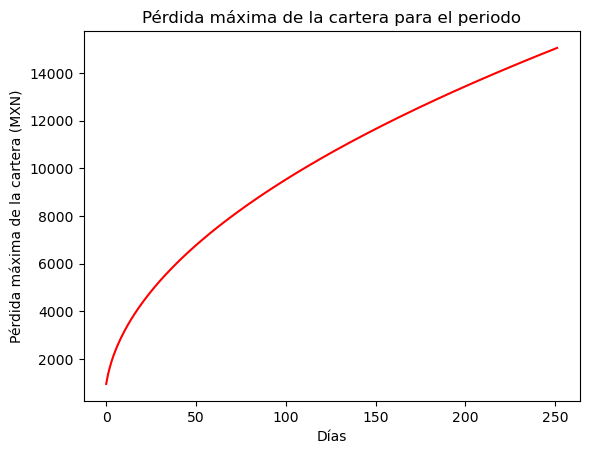

In [114]:
from scipy.stats import norm
pesos = np.array(list(cleaned_weights1.values()))
portfolio_mean = df_activos.mean().dot(pesos)
portfolio_stdev = np.sqrt(pesos.T.dot(df_activos.cov().dot(pesos)))

investment = int(100000)

mean_investment = (1+portfolio_mean) * investment
stdev_investment = investment * portfolio_stdev

conf_level = 0.05
cut = norm.ppf(conf_level, mean_investment, stdev_investment)

var_1d = investment - cut 
days = int(252)

print(("\nLa pérdida máxima de tu cartera inicial de " + str(investment) + 
    " usd con un nivel de confianza del " + str((1 - conf_level) * 100) + "% y para los siguientes " + str(days) + " días es de:\n"))



var_array = []

for i in range(1, days+1):
    var_array.append(np.round(var_1d * np.sqrt(i), 2))
    print("A " + str(i) + " días, VaR(" + str((1 - conf_level) * 100) + "%) = " + str(((np.round(var_1d * np.sqrt(i), 2))))+ "   Portfolio : " +str((np.round(investment * (1+portfolio_mean)**(i),2 ))))

plt.xlabel("Días")
plt.ylabel("Pérdida máxima de la cartera (MXN)")
plt.title("Pérdida máxima de la cartera para el periodo")
plt.plot(var_array,"r")

returns.hist(bins=50,histtype="stepfilled",alpha=0.5)
plt.show()